In [7]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set_theme()

## Import Data

In [3]:
df = pd.read_csv('/Users/josh/Desktop/Macbook Working Files/Git Repos/650-DRAGON-SLAYERS/FILES/Data/patient_df_capped.csv')

df

,AGE_AT_ADMISSION,LOS,LOS_ICU_MEAN,WEIGHT_MEAN,HEARTRATE_MEAN,SBP_MEAN,DBP_MEAN,MAP_MEAN,RR_MEAN,TEMP_MIN_C,...,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,ETHNICITY_CONSOLIDATED_ASIAN,ETHNICITY_CONSOLIDATED_BLACK OR AFRICAN AMERICAN,ETHNICITY_CONSOLIDATED_HISPANIC OR LATINO,ETHNICITY_CONSOLIDATED_MIDDLE EASTERN,ETHNICITY_CONSOLIDATED_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ETHNICITY_CONSOLIDATED_OTHER,ETHNICITY_CONSOLIDATED_UNKNOWN/NOT SPECIFIED/DECLINED,ETHNICITY_CONSOLIDATED_WHITE
0,73.0,15.0,8.628850,95.617194,76.692308,119.746305,49.842365,69.478653,20.064685,35.944422,...,1,0,0,0,0,0,0,0,0,1
1,59.0,8.0,8.486200,105.777654,100.165899,107.517375,58.108108,74.111111,15.427046,35.555556,...,1,0,0,1,0,0,0,0,0,0
2,86.0,7.0,2.356450,62.750000,94.541401,124.607143,54.059524,78.285714,20.942308,34.500000,...,1,0,0,0,0,0,0,0,0,1
3,53.0,34.0,8.907775,76.020000,103.072883,106.230753,67.840217,81.638708,22.427332,35.000000,...,1,0,0,0,0,0,0,0,0,1
4,59.0,1.0,1.299800,84.400002,110.307692,68.079180,46.096386,57.927708,21.491228,35.222211,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,81.0,1.0,1.640700,87.600000,86.250000,123.419355,70.580645,82.645161,17.812500,36.111111,...,1,0,0,0,0,0,0,0,0,1
4551,81.0,13.0,5.027500,63.185366,105.358491,113.904762,67.142857,78.123810,22.330189,35.666667,...,1,0,1,0,0,0,0,0,0,0
4552,75.0,4.0,1.650000,67.700000,82.810811,115.675676,63.540541,76.405405,20.027027,36.888889,...,1,0,0,0,1,0,0,0,0,0
4553,76.0,14.0,3.272300,71.300000,93.837209,124.887640,57.966292,77.786517,19.288462,36.055556,...,0,0,0,0,0,0,0,0,0,1


## Statistics

- 5 Number Summary:
  - Min
  - Q1
  - Q2
  - Q3
  - Max

- Mean, CI, P-Value


In [4]:
import pandas as pd
import numpy as np
from scipy import stats

def compute_grouped_statistics(df, group_col='MORTALITY', exclude_cols=None, confidence=0.95):
    """
    Computes 5-Number Summary, Mean, 95% CI for the mean, and P-Value for each numeric column,
    grouped by the specified group column, excluding specified columns.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - group_col (str): The column name to group by.
    - exclude_cols (list or None): List of column names to exclude from analysis.
                                   Set to None to exclude no additional columns.
    - confidence (float): The confidence level for the CI.

    Returns:
    - stats_df (pd.DataFrame): DataFrame containing the computed statistics with p-values in scientific notation.
    """
    # Initialize exclude_cols if not provided
    if exclude_cols is None:
        exclude_cols = []
    
    # Ensure the group column exists
    if group_col not in df.columns:
        raise ValueError(f"Group column '{group_col}' not found in DataFrame.")
    
    # Combine group_col and exclude_cols for exclusion
    columns_to_exclude = [group_col] + exclude_cols
    
    # Select numeric columns excluding the specified columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(columns_to_exclude, errors='ignore')
    
    # Initialize a dictionary to store statistics
    stats_dict = {}
    
    # Get the unique groups
    groups = df[group_col].dropna().unique()
    groups_sorted = sorted(groups)  # Ensure consistent order
    
    if len(groups_sorted) != 2:
        raise ValueError(f"Expected exactly 2 groups in '{group_col}', found {len(groups_sorted)}.")
    
    group1, group2 = groups_sorted
    
    for col in numeric_cols:
        stats_dict[col] = {}
        data1 = df[df[group_col] == group1][col].dropna()
        data2 = df[df[group_col] == group2][col].dropna()
    
        for grp, data in zip([group1, group2], [data1, data2]):
            # 5-Number Summary
            min_val = data.min()
            q1 = data.quantile(0.25)
            median = data.median()
            q3 = data.quantile(0.75)
            max_val = data.max()
    
            # Mean
            mean = data.mean()
    
            # 95% Confidence Interval for the Mean
            sem = stats.sem(data)  # Standard Error of the Mean
            if len(data) > 1:
                ci_range = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
                ci_lower = mean - ci_range
                ci_upper = mean + ci_range
            else:
                ci_lower, ci_upper = np.nan, np.nan  # Not enough data for CI
    
            # Store the statistics with group identifier
            stats_dict[col][f'Group {grp} Min'] = min_val
            stats_dict[col][f'Group {grp} Q1'] = q1
            stats_dict[col][f'Group {grp} Median'] = median
            stats_dict[col][f'Group {grp} Q3'] = q3
            stats_dict[col][f'Group {grp} Max'] = max_val
            stats_dict[col][f'Group {grp} Mean'] = mean
            stats_dict[col][f'Group {grp} 95% CI Lower'] = ci_lower
            stats_dict[col][f'Group {grp} 95% CI Upper'] = ci_upper
    
        # P-Value: Comparing the two groups using independent t-test
        # Assumption: Independent samples, normally distributed, unequal variance (Welch’s t-test)
        if len(data1) > 1 and len(data2) > 1:
            t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False, nan_policy='omit')
        else:
            p_val = np.nan  # Not enough data for p-value
    
        stats_dict[col][f'P-Value (Group {group1} vs Group {group2})'] = p_val
    
    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_dict).T
    
    # Identify p-value columns
    pval_cols = [col for col in stats_df.columns if 'P-Value' in col]
    other_cols = [col for col in stats_df.columns if col not in pval_cols]
    
    # Round non-p-value columns to 4 decimal places
    stats_df[other_cols] = stats_df[other_cols].round(4)
    
    # Format p-value columns in scientific notation
    stats_df[pval_cols] = stats_df[pval_cols].applymap(
        lambda x: f"{x:.2e}" if pd.notnull(x) else x
    )
    
    return stats_df

# Example usage:
# Assuming patient_df_capped is your DataFrame and 'HOSPITAL_EXPIRE_FLAG' is the group column
# and you want to exclude 'SUBJECT_ID' from the analysis
stats_summary = compute_grouped_statistics(
    df,
    group_col='MORTALITY',
    exclude_cols=['SUBJECT_ID']
)
stats_summary


,Group 0 Min,Group 0 Q1,Group 0 Median,Group 0 Q3,Group 0 Max,Group 0 Mean,Group 0 95% CI Lower,Group 0 95% CI Upper,Group 1 Min,Group 1 Q1,Group 1 Median,Group 1 Q3,Group 1 Max,Group 1 Mean,Group 1 95% CI Lower,Group 1 95% CI Upper,P-Value (Group 0 vs Group 1)
AGE_AT_ADMISSION,34.2983,60.0000,72.0000,82.0000,92.0000,70.2793,69.4675,71.0911,34.2983,55.0000,67.0000,80.0000,92.0000,66.3547,65.8040,66.9055,6.24e-15
LOS,0.0000,7.0000,13.0000,29.7500,47.6879,18.5120,17.7062,19.3177,-1.0000,4.0000,8.0000,16.0000,47.6879,11.3806,11.0295,11.7316,2.00e-53
LOS_ICU_MEAN,0.5202,2.4583,4.3431,9.6222,22.7508,7.1504,6.7878,7.5131,0.1583,1.9389,3.5094,7.4640,22.7508,5.6759,5.4888,5.8630,1.88e-12
WEIGHT_MEAN,32.5424,65.9700,78.4136,91.0375,133.7000,79.9468,78.8430,81.0506,32.5424,67.4970,80.5000,95.1182,133.7000,82.9039,82.1627,83.6451,1.34e-05
HEARTRATE_MEAN,62.0220,78.8876,86.5547,95.1353,116.5573,87.0909,86.4337,87.7481,62.0220,80.5301,89.4375,99.5064,116.5573,89.9568,89.5002,90.4135,2.74e-12
SBP_MEAN,67.9649,106.0652,114.3110,124.6163,172.9796,115.8958,115.1019,116.6897,55.0989,103.0902,111.8824,121.7225,172.9796,112.6069,112.0836,113.1301,1.45e-11
DBP_MEAN,33.9054,52.8248,57.7232,63.2978,84.4454,58.5420,58.0619,59.0220,33.9054,52.8750,58.3551,64.5873,84.4454,58.9291,58.6115,59.2467,1.87e-01
MAP_MEAN,55.7559,70.3397,75.3945,81.2836,95.0653,76.0140,75.5646,76.4634,55.7559,68.7214,74.5806,80.7290,95.0653,75.0111,74.6983,75.3239,3.33e-04
RR_MEAN,13.1392,17.9067,20.0933,22.3265,27.8303,20.1908,20.0177,20.3639,13.1392,17.9734,20.2836,22.8558,27.8303,20.4973,20.3766,20.6181,4.42e-03
TEMP_MIN_C,19.7993,34.8333,35.3333,35.7222,37.6667,34.3334,34.1245,34.5424,19.7993,35.0000,35.5556,36.0556,39.7222,34.7919,34.6779,34.9059,1.63e-04


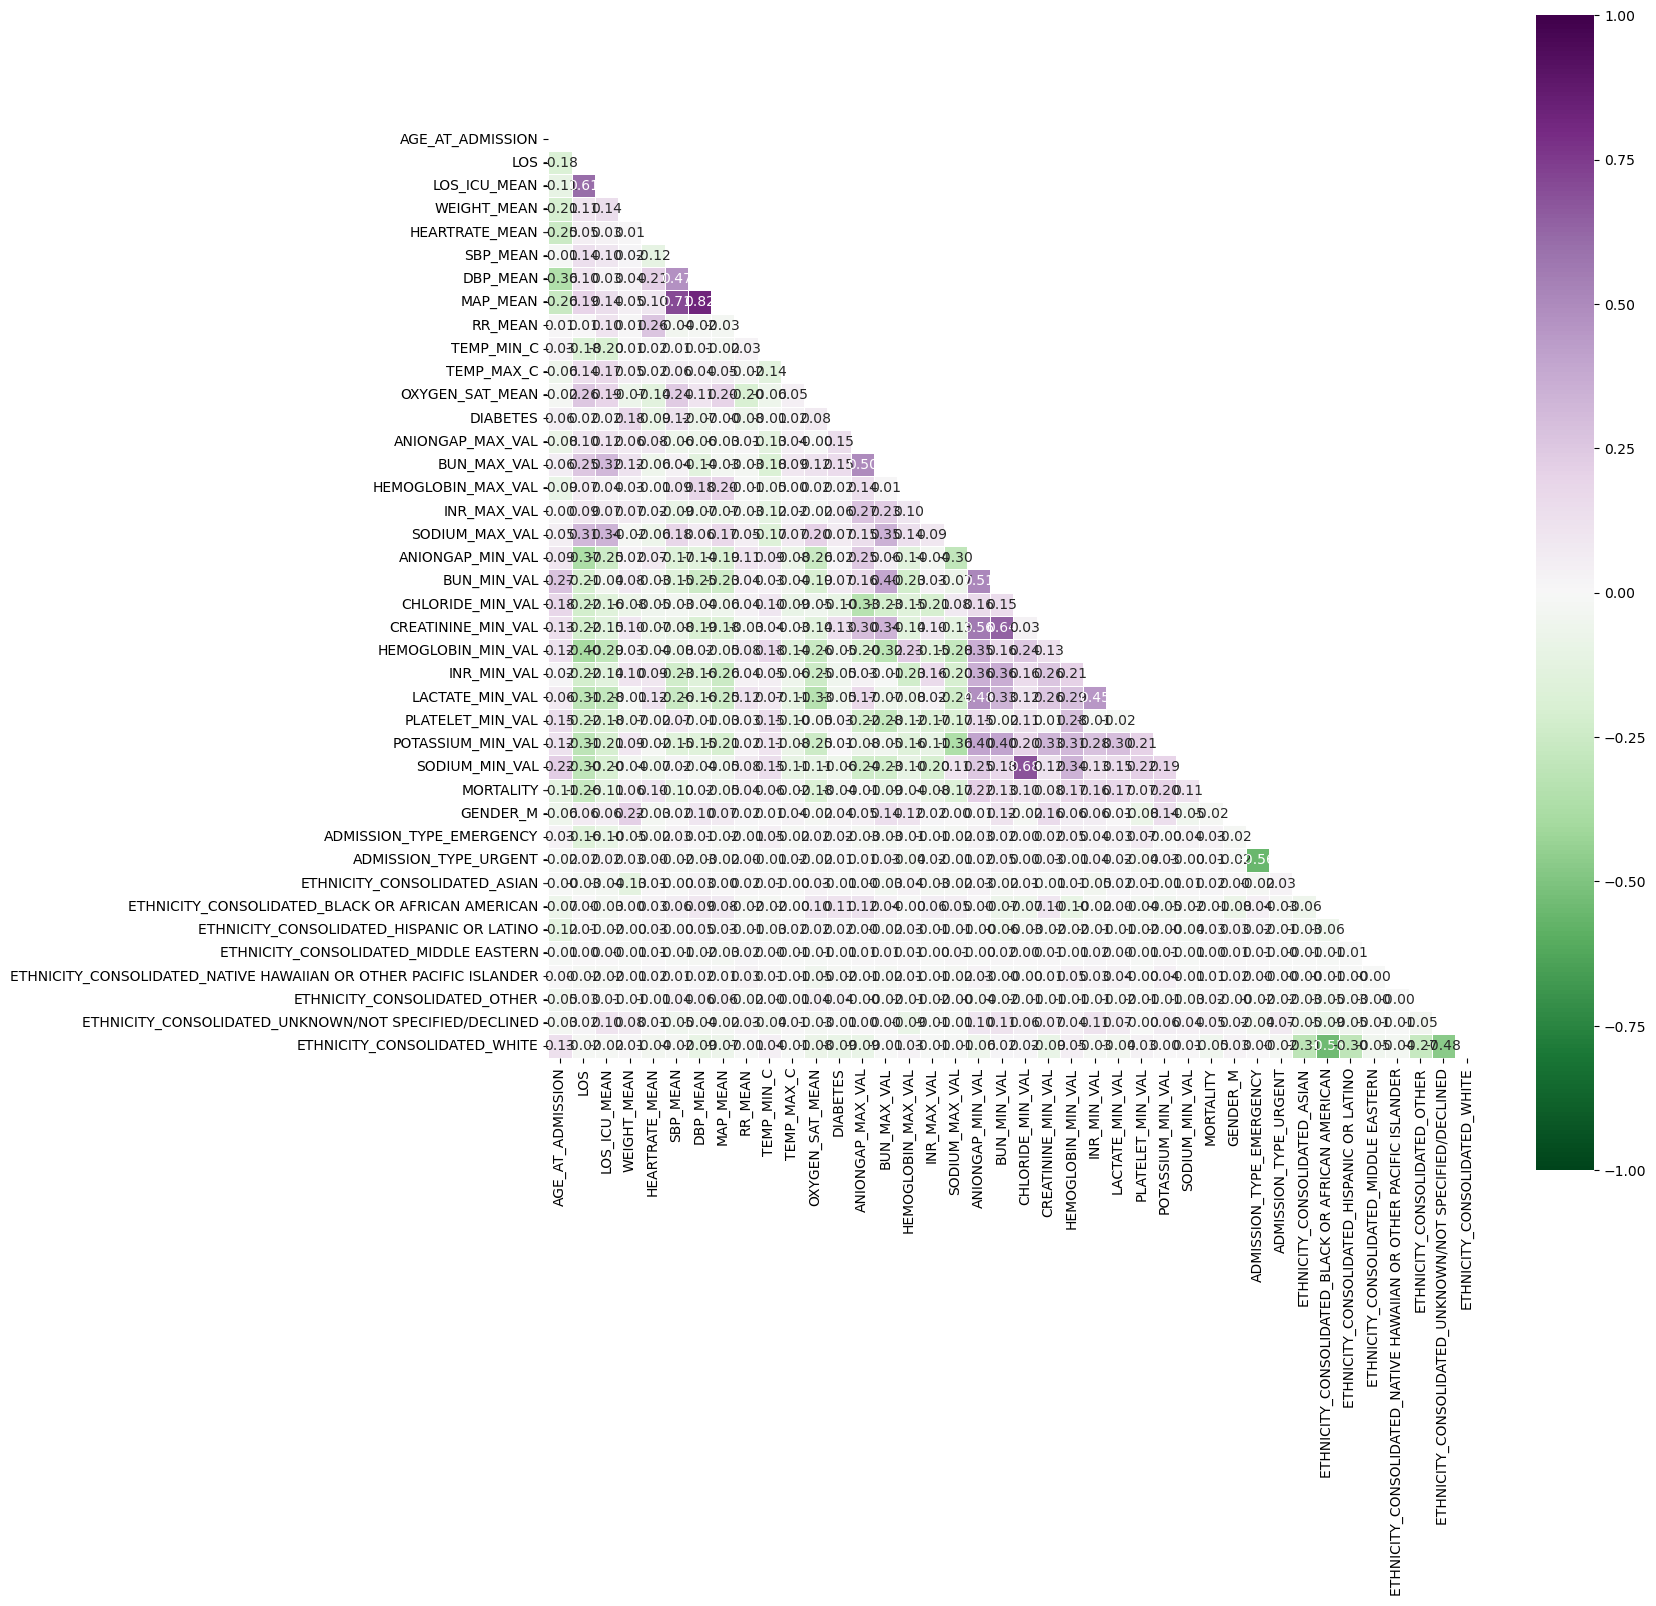

In [5]:
num_df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
coco = num_df.corr()
tri_matrix = np.triu(coco)
plt.figure(figsize=(15, 15))
sns.heatmap(coco, square=True, linewidth=0.5, vmin=-1, vmax=1, cmap='PRGn_r', mask=tri_matrix, annot=True, fmt='.2f')
plt.show()

Age at Admission Summary:
count    4555.000000
mean       67.452404
std        15.828506
min        34.298338
25%        56.000000
50%        69.000000
75%        80.000000
max        92.000000
Name: AGE_AT_ADMISSION, dtype: float64


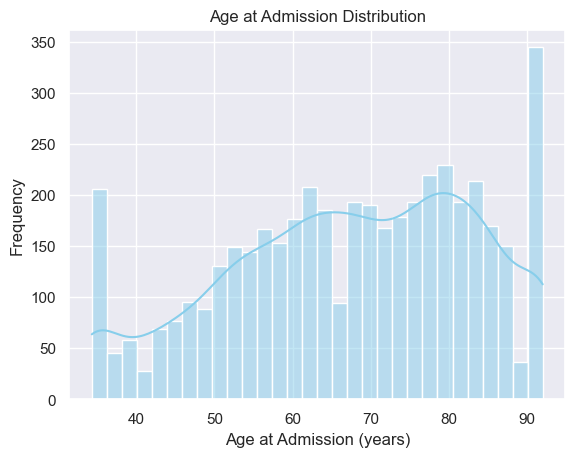

In [8]:
# Summary Statistics
age_stats = df['AGE_AT_ADMISSION'].describe()
print("Age at Admission Summary:")
print(age_stats)

# Distribution Plot
sns.histplot(df['AGE_AT_ADMISSION'], kde=True, bins=30, color='skyblue')
plt.title('Age at Admission Distribution')
plt.xlabel('Age at Admission (years)')
plt.ylabel('Frequency')
plt.show()


Heartrate Mean Summary:
count    4555.000000
mean       89.155259
std        13.030543
min        62.021982
25%        80.017966
50%        88.666884
75%        98.306489
max       116.557259
Name: HEARTRATE_MEAN, dtype: float64


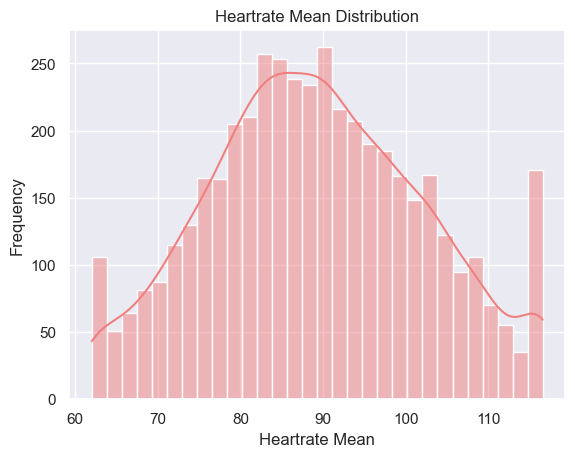

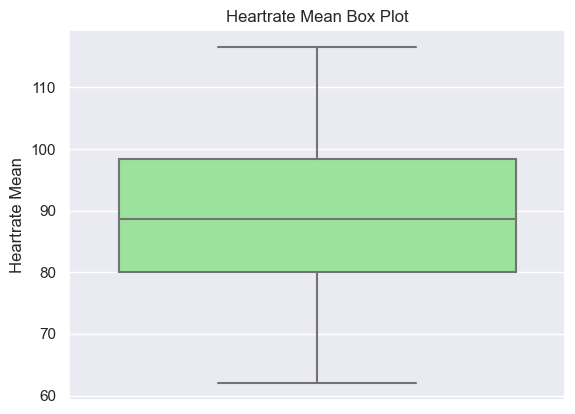


Sbp Mean Summary:
count    4555.000000
mean      113.526759
std        15.125676
min        55.098921
25%       103.860337
50%       112.458333
75%       122.384418
max       172.979551
Name: SBP_MEAN, dtype: float64


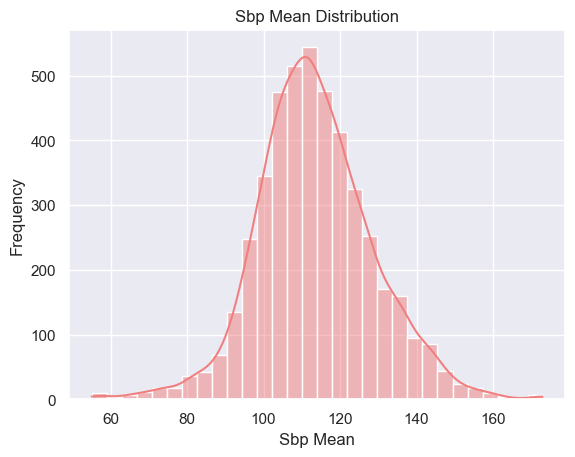

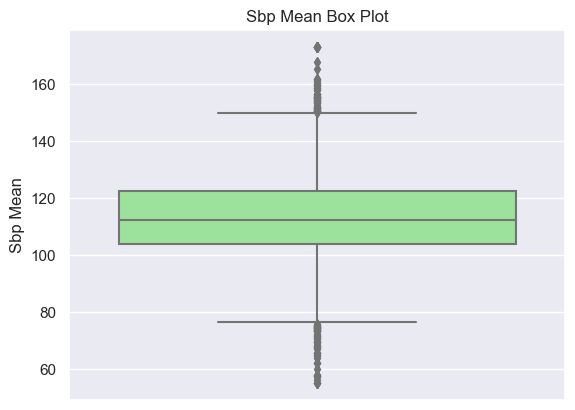


Dbp Mean Summary:
count    4555.000000
mean       58.820823
std         9.130411
min        33.905407
25%        52.852099
50%        58.151445
75%        64.289993
max        84.445407
Name: DBP_MEAN, dtype: float64


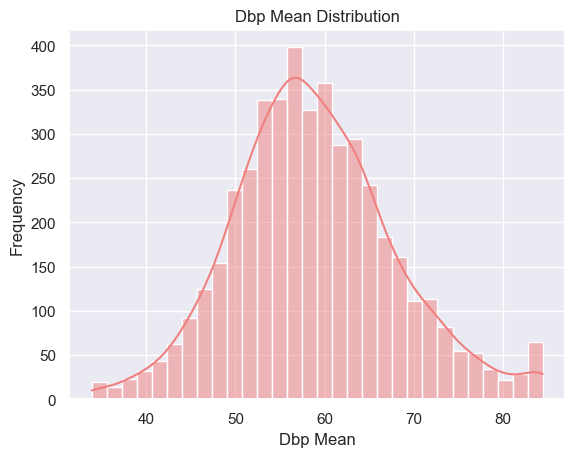

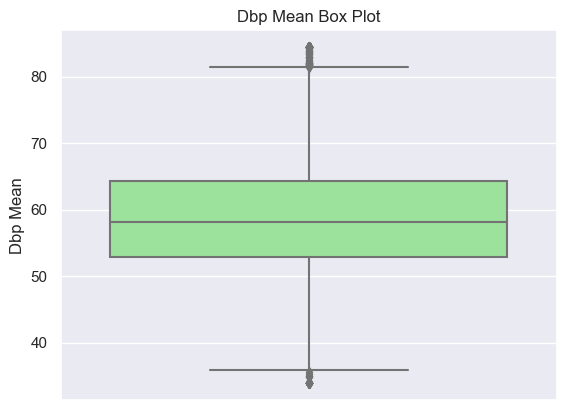


Map Mean Summary:
count    4555.000000
mean       75.291577
std         8.890569
min        55.755894
25%        69.212331
50%        74.809358
75%        80.898046
max        95.065321
Name: MAP_MEAN, dtype: float64


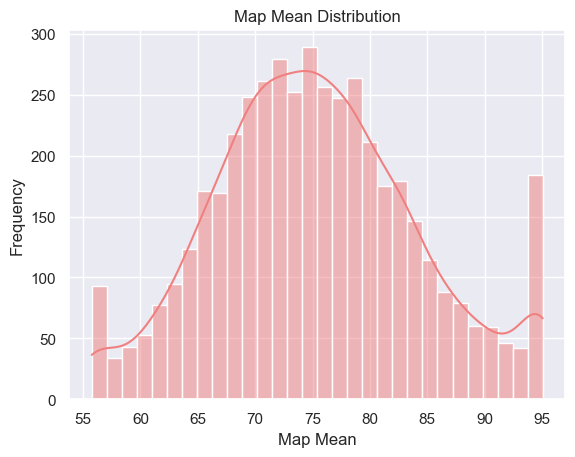

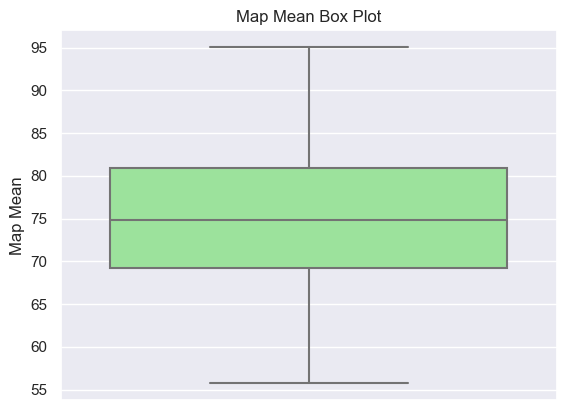


Rr Mean Summary:
count    4555.000000
mean       20.411599
std         3.428207
min        13.139190
25%        17.958893
50%        20.238636
75%        22.687808
max        27.830321
Name: RR_MEAN, dtype: float64


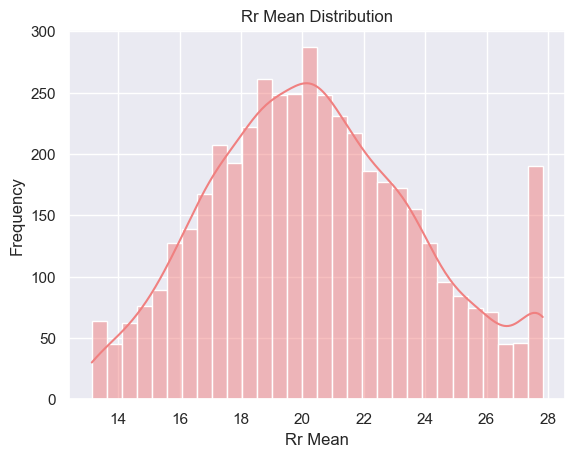

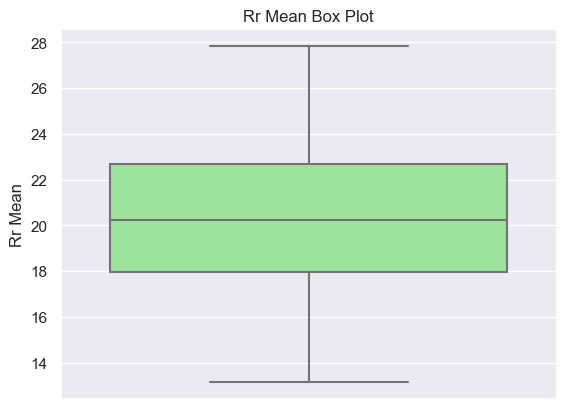


Temp Mean C Summary:


KeyError: 'TEMP_MEAN_C'

In [9]:


vital_signs = ['HEARTRATE_MEAN', 'SBP_MEAN', 'DBP_MEAN',
               'MAP_MEAN', 'RR_MEAN', 'TEMP_MEAN_C', 'OXYGEN_SAT_MEAN']

for sign in vital_signs:
    print(f"\n{sign.replace('_', ' ').title()} Summary:")
    print(df[sign].describe())

    # Distribution Plot
    sns.histplot(df[sign], kde=True, bins=30, color='lightcoral')
    plt.title(f'{sign.replace("_", " ").title()} Distribution')
    plt.xlabel(sign.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    sns.boxplot(y=sign, data=df, color='lightgreen')
    plt.title(f'{sign.replace("_", " ").title()} Box Plot')
    plt.ylabel(sign.replace('_', ' ').title())
    plt.show()




Length of Stay (LOS) Summary:
count    4555.000000
mean       13.375153
std        12.086853
min        -1.000000
25%         5.000000
50%         9.000000
75%        18.000000
max        47.687907
Name: LOS, dtype: float64


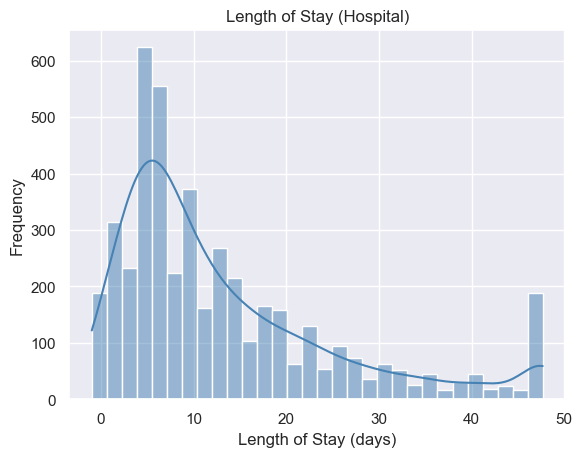


Length of Stay in ICU (LOS_ICU_MEAN) Summary:
count    4555.000000
mean        6.088306
std         5.841343
min         0.158300
25%         2.059300
50%         3.701900
75%         7.992150
max        22.750762
Name: LOS_ICU_MEAN, dtype: float64


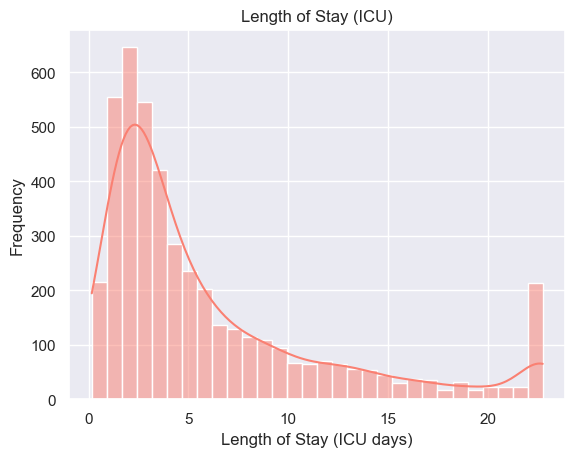


Weight Mean Summary:
count    4555.000000
mean       82.076816
std        21.264211
min        32.542400
25%        67.099999
50%        80.000000
75%        93.950000
max       133.700032
Name: WEIGHT_MEAN, dtype: float64


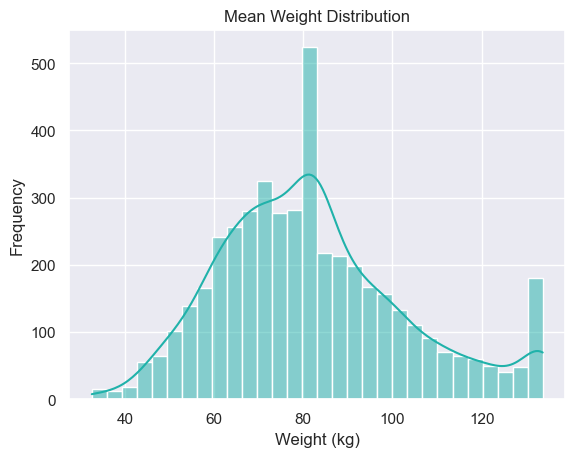

In [10]:
# Length of Stay in Hospital
print("\nLength of Stay (LOS) Summary:")
print(df['LOS'].describe())

sns.histplot(df['LOS'], kde=True, bins=30, color='steelblue')
plt.title('Length of Stay (Hospital)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# Length of Stay in ICU
print("\nLength of Stay in ICU (LOS_ICU_MEAN) Summary:")
print(df['LOS_ICU_MEAN'].describe())

sns.histplot(df['LOS_ICU_MEAN'], kde=True, bins=30, color='salmon')
plt.title('Length of Stay (ICU)')
plt.xlabel('Length of Stay (ICU days)')
plt.ylabel('Frequency')
plt.show()

# Weight Mean
print("\nWeight Mean Summary:")
print(df['WEIGHT_MEAN'].describe())

sns.histplot(df['WEIGHT_MEAN'], kde=True, bins=30, color='lightseagreen')
plt.title('Mean Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

30-Day Mortality Counts:
1    3281
0    1274
Name: MORTALITY, dtype: int64

30-Day Mortality Percentage:
1    72.030735
0    27.969265
Name: MORTALITY, dtype: float64


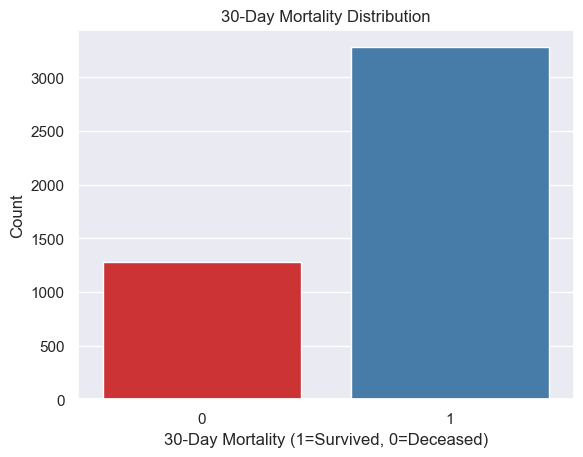

In [14]:
# Frequency Counts
mortality_counts = df['MORTALITY'].value_counts()
print("30-Day Mortality Counts:")
print(mortality_counts)

# Percentage Distribution
mortality_percentage = df['MORTALITY'].value_counts(normalize=True) * 100
print("\n30-Day Mortality Percentage:")
print(mortality_percentage)

# Bar Chart
sns.countplot(x='MORTALITY', data=df, palette='Set1')
plt.title('30-Day Mortality Distribution')
plt.xlabel('30-Day Mortality (1=Survived, 0=Deceased)')
plt.ylabel('Count')
plt.show()
